In [51]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as p
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os
import copy
sns.set_style('white')
sns.set_style('ticks')
sns.set_color_codes()
sns.set_context('paper')

fgm_simulation_path = '../code/simulations.py'
sys.path.append(os.path.dirname(os.path.expanduser(fgm_simulation_path)))


from simulations import simulation, nball_pull, gaussian_fitness

tools_path = '../code/tools.py'
sys.path.append(os.path.dirname(os.path.expanduser(tools_path)))

import tools
import graphs



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
np.random.seed(953527608) # for exact figure reproducibility use this seed
# np.random.seed(None)

In [23]:
n_close_conditions = 50
n_far_conditions = 0
n_conditions = n_close_conditions + n_far_conditions

n_mutants = 100


d_list = [2,3,4,5,10,20,30,40,49]

entry_dict = {}

for this_d in d_list:

    d_true_close = this_d
    d_true_far = 0
    d_true = d_true_close + d_true_far

    mutant_center = np.asarray([1.0]+[0.0]*(d_true-1))
    condition_center = np.asarray([2.0]+[0.0]*(d_true-1))
    condition_points = []
    for c in range(n_close_conditions):
    #             condition_points.append(list(nball_pull(d_true,0.1,[1.0]+[1.0]*(d_true-1),fixed_radius=True)))
        condition_points.append(list(nball_pull(d_true,0.1,[1.0]+[1.0]*(d_true_close-1)+[0.0]*(d_true_far),fixed_radius=True)))

    for c in range(n_far_conditions):
    #             condition_points.append(list(nball_pull(d_true,0.1,[1.0]+[1.0]*(d_true-1),fixed_radius=True)))
        condition_points.append(list(nball_pull(d_true,0.1,[1.0]+[1.0]*(d_true_close-1)+[1.0]*(d_true_far),fixed_radius=True)))

    mutant_points = []
    for m in range(n_mutants):
    #             mutant_points.append(list(nball_pull(d_true,1.0,[1.0]+[1.0]*(d_true-1),fixed_radius=True)))
        mutant_points.append(list(nball_pull(d_true,0.1,[1.0]+[1.0]*(d_true-1),fixed_radius=True)))
    Ancestor = np.asarray([0.0]+[0.0]*(d_true-1))
    Mutants = mutant_center + np.asarray(mutant_points)
    Conditions = condition_center + np.asarray(condition_points)
    f = tools.calculate_fitness_linear(Mutants,Conditions,Ancestor)
    
    entry_dict[this_d] = [f,Mutants,Conditions,Ancestor]



# plt.plot(tools.SVD_fits(f)[0])

0.0005266276645447761
1.3524692694552943e-11
5.237063585361064e-06 1.2675876336115621e-11 2.4204167334435172e-06
2
0.0016591329954926623
1.3423999225230515e-10
5.237581792553504e-06 1.2695778517887755e-10 2.4239771369180125e-05
2
0.005263696567702064
1.3511397141447439e-09
5.244386168809611e-06 1.2848917718222697e-09 0.0002450032721587165
2
0.016702594131879835
1.3604681604046832e-08
5.235525430733478e-06 1.3444939582415357e-08 0.002568021063080152
2
0.052910270066006744
1.3652603637740137e-07
5.252326026032155e-06 1.3104331710058638e-07 0.024949577853906082
2
0.16634155865783362
1.3494438402372952e-06
5.755851291880766e-06 1.2850698126733507e-06 0.22326320599805574
2
0.0005256393516295038
1.3994353227330858e-11
2.056900575815118e-06 1.3762793214162776e-11 6.691034742264484e-06
3
0.0016661133437387086
1.4060027329766692e-10
2.0541216808464703e-06 1.3824615332210595e-10 6.730183251127408e-05
3
0.005260428488318374
1.4015971678953148e-09
2.059479282684809e-06 1.3815436489673108e-09 0.000

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


0.00526023047729254
1.3879178514967982e-09
6.684811125092515e-07 1.3529446929343954e-09 0.002023908630501017
5
0.016582695058124094
1.3793070484945926e-08
1.4436626873719968e-08 1.319641691653333e-08 0.9140928162766137
6
0.052796917662034
1.3982299171159644e-07
7.125300832005021e-07 1.21065418189326e-07 0.16990920249364244
5
0.16618687898136067
1.3852409008445761e-06
1.3921368916931176e-06 1.1715105146807804e-06 0.8415196247374701
6
0.0005259648696876488
1.3705649326832913e-11
7.195891951501079e-08 1.1049557800229791e-11 0.00015355369250541386
10
0.0016646973212767308
1.372950927370727e-10
7.268402504990677e-08 1.1638399700498644e-10 0.0016012321404197706
10
0.00527106140060479
1.3765149834477658e-09
7.288842636621203e-08 1.1941147254167168e-09 0.01638277549603208
10
0.01663918002968087
1.3717112182771849e-08
8.069478795320974e-08 1.1031198476912393e-08 0.13670273826493912
10
0.05267512660707431
1.3746125956916398e-07
1.750972341442079e-07 1.2346361560477616e-07 0.7051145965166592
9
0.

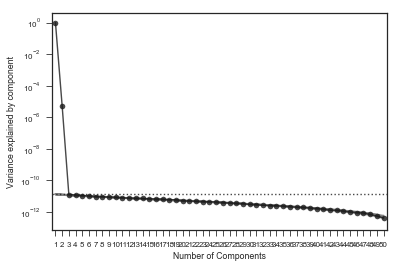

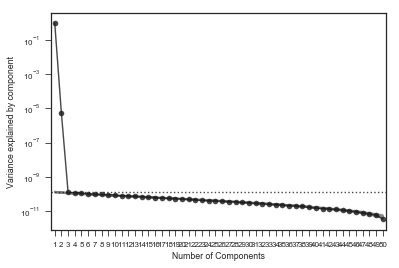

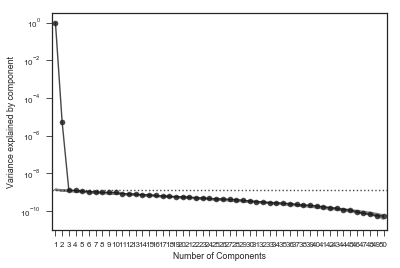

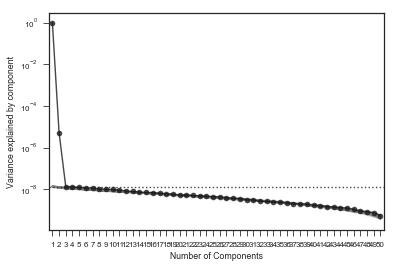

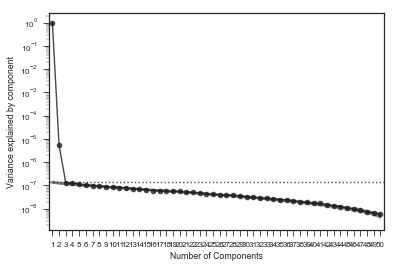

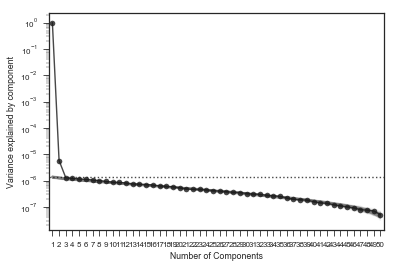

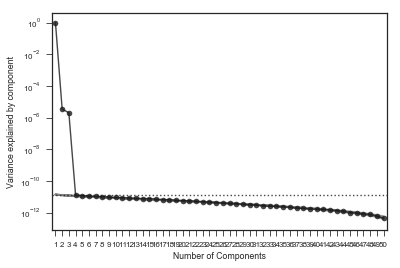

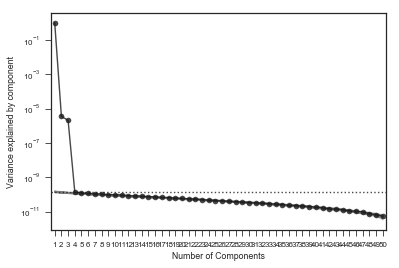

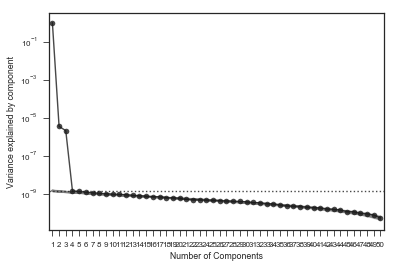

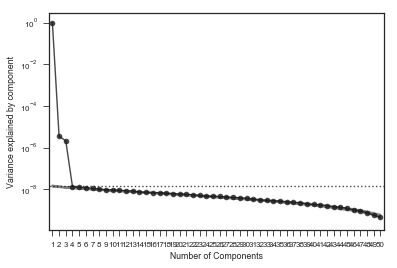

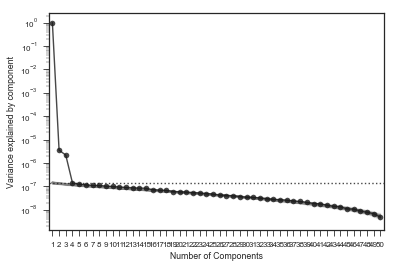

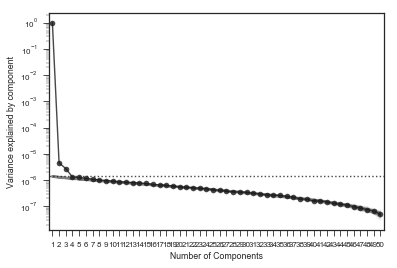

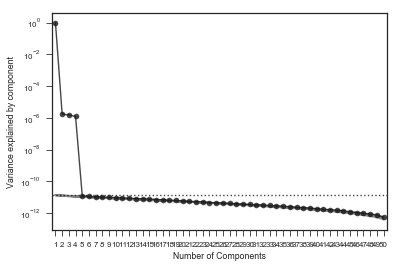

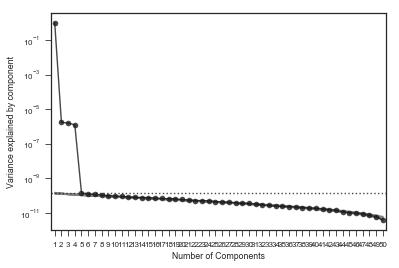

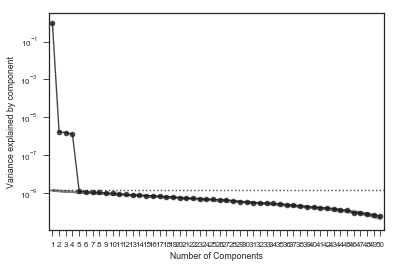

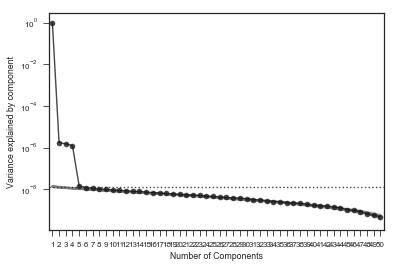

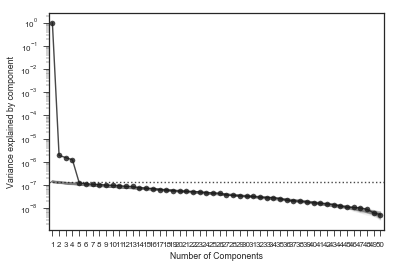

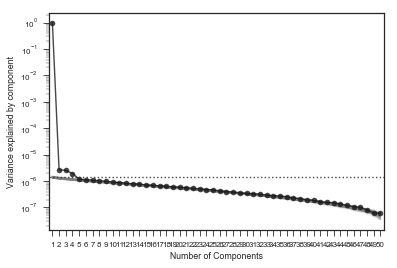

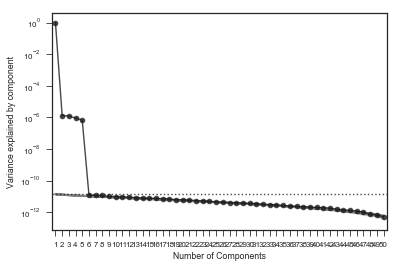

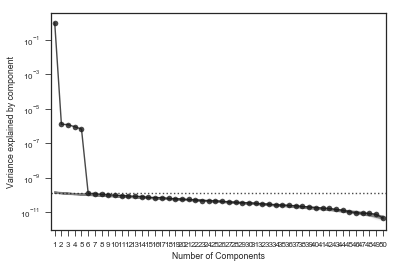

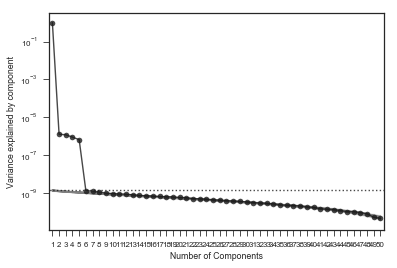

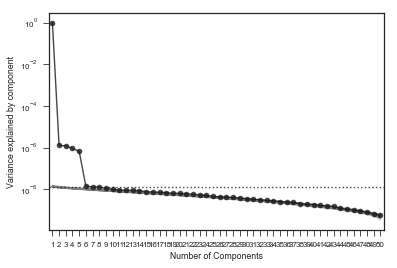

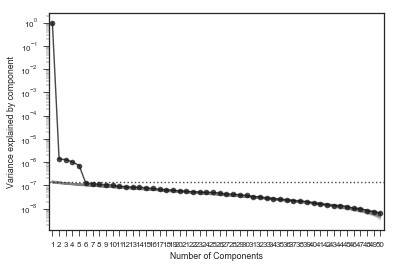

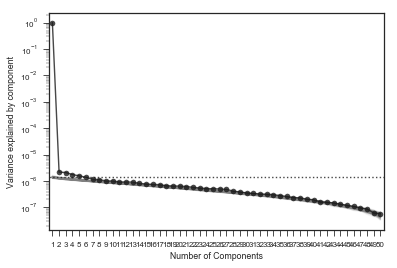

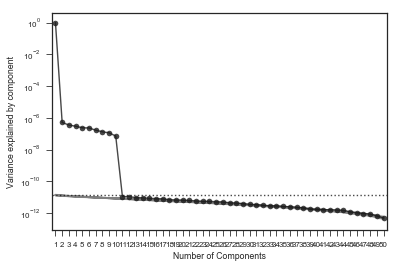

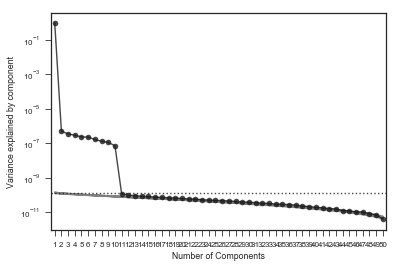

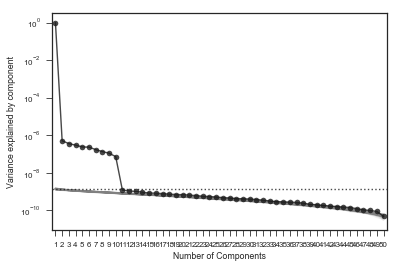

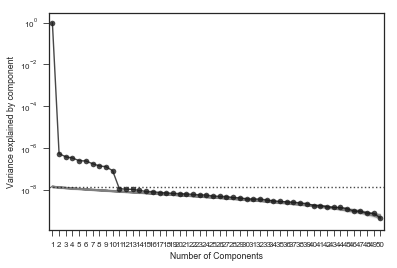

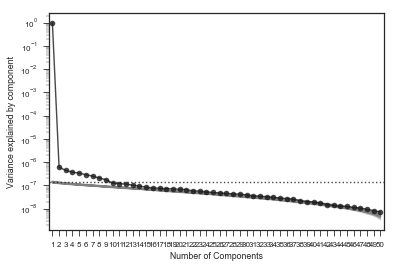

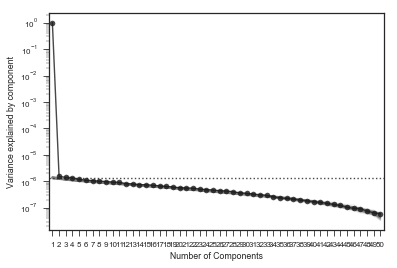

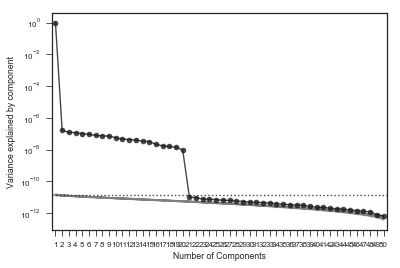

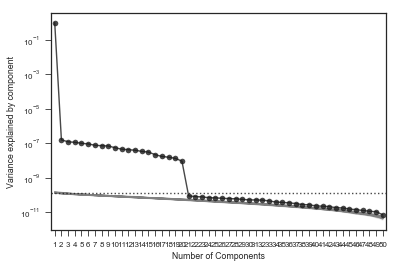

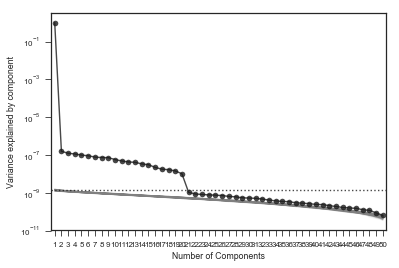

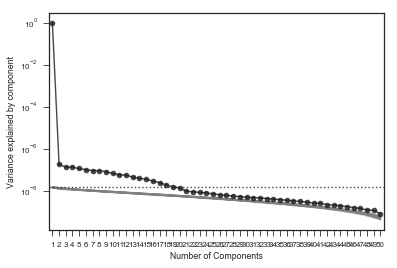

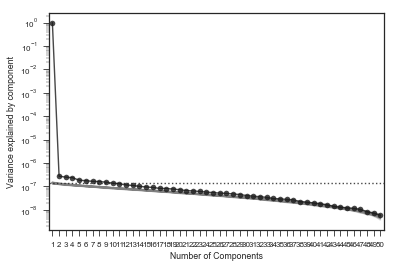

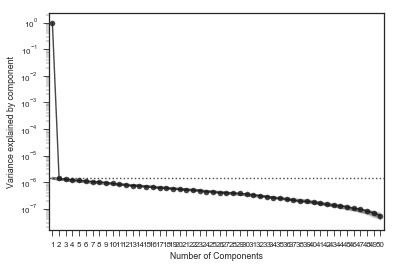

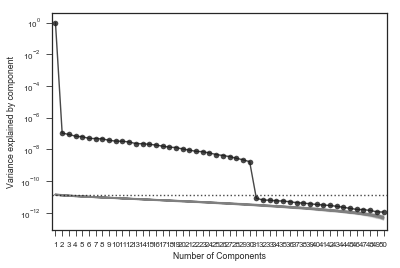

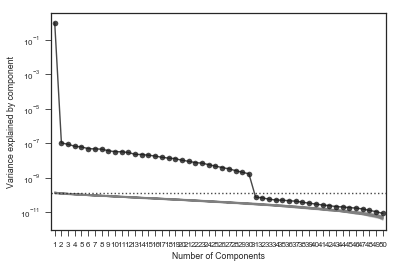

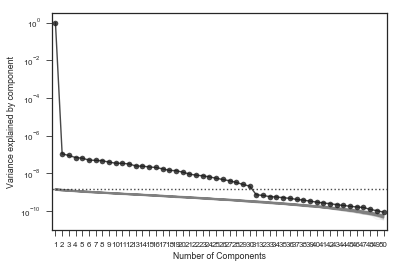

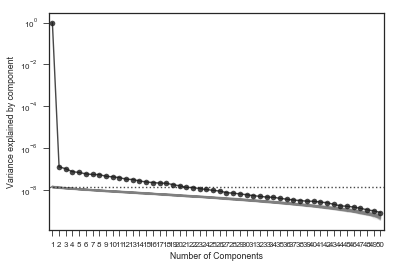

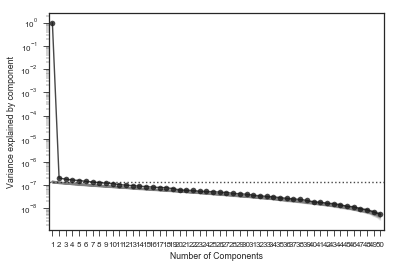

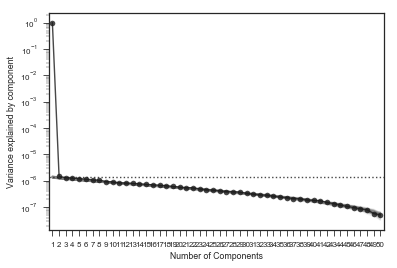

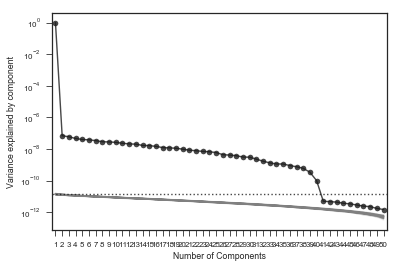

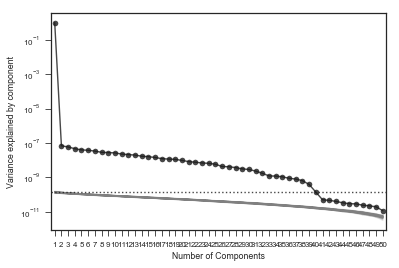

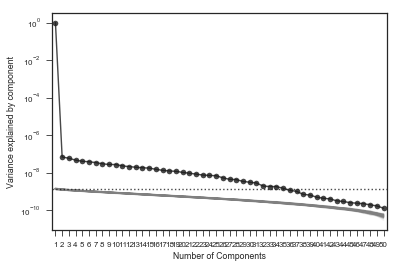

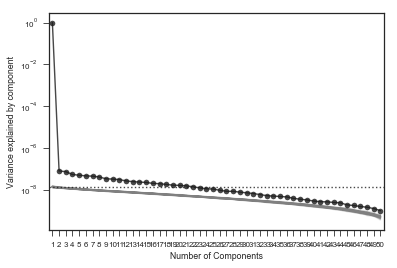

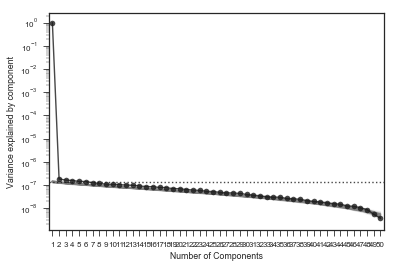

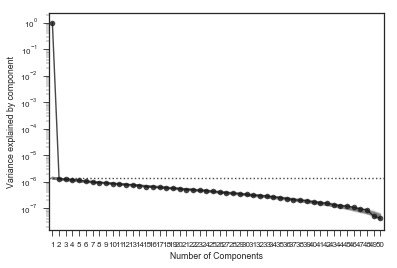

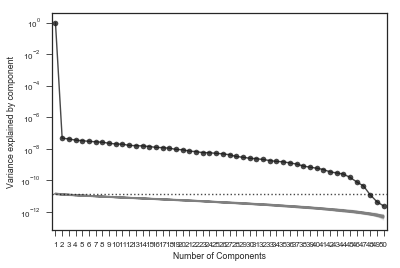

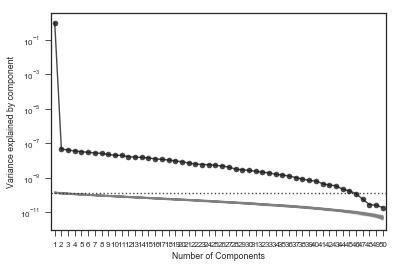

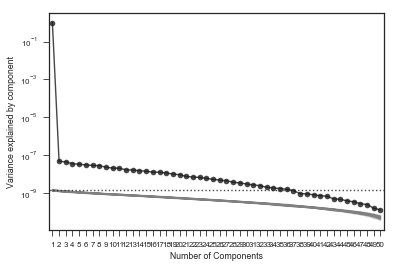

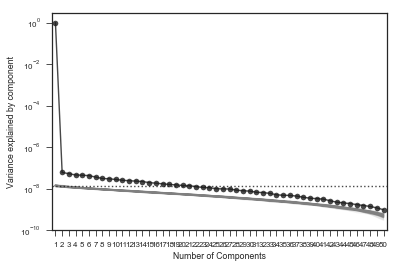

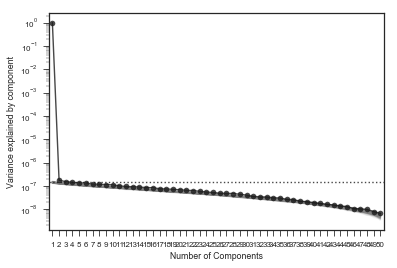

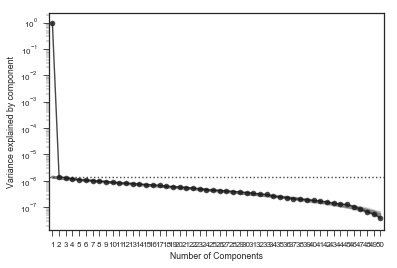

In [35]:
err_list = [1e-9,1e-8,1e-7,1e-6,1e-5,1e-4]

detect_dict = {}

for d_true,entries in entry_dict.items():
    f = entries[0]
    detect_dict[d_true] = []
    for e,err in enumerate(err_list):
        # data pulled from the truth with our measurement error

        this_f = np.asarray([np.random.normal(f.flatten()[i],np.sqrt(err)) for i in range(len(f.flatten()))]).reshape(f.shape[0],f.shape[1])
        fig,ax = plt.subplots()
        ax,max_d,s,s_squre = graphs.svd_noise_comparison_figure(ax,this_f,np.ones(this_f.shape)*np.sqrt(err),n_pulls=100,annotate=False,output=True)
        plt.yscale('log')
        
        detect_dict[d_true].append(max_d)
    

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/legend.py:593: UserWarning: The handle <matplotlib.lines.Line2D object at 0x126c9de10> has a label of '_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


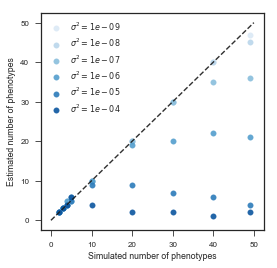

In [52]:
plt.figure(figsize=(4,4))
e_colors = sns.color_palette('Blues',len(err_list))
# e_names = ['Low Noise','Medium Noise','High Noise']
plt.plot([0,50],[0,50],'k--',alpha=0.9)
for d_true,out_list in detect_dict.items():
    for e,err in enumerate(err_list):
        plt.scatter(d_true,out_list[e],color=e_colors[e],alpha=0.9)
        

plt.xlabel('Simulated number of phenotypes')
plt.ylabel('Estimated number of phenotypes')
plt.legend(['_']+[rf'$\sigma^2={err:.0e}$'for err in err_list])
plt.savefig('figureS1B.pdf',bbox_inches='tight')

In [64]:
err_list = [1e-9,1e-8,1e-7,1e-6,1e-5,1e-4]

detect_dict_CV = {}

for d_true,entries in entry_dict.items():
    f = entries[0]
    detect_dict_CV[d_true] = []
    for e,err in enumerate(err_list):
        # data pulled from the truth with our measurement error

        this_f = np.asarray([np.random.normal(f.flatten()[i],np.sqrt(err)) for i in range(len(f.flatten()))]).reshape(f.shape[0],f.shape[1])
        
        for iteration in range(n_conditions):
            
            test_c = sorted(np.asarray([iteration]))
            train_c = [c for c in range(n_conditions) if c not in test_c]
#             train_c = sorted(np.random.choice(n_conditions,int(n_conditions/2),replace=False))
#             test_c = [c for c in range(n_conditions) if c not in train_c ]
            train_m = sorted(np.random.choice(n_mutants,int(n_mutants/2),replace=False))
            test_m = [m for m in range(n_mutants) if m not in train_m ]

            train = [train_c,train_m]
            test = [test_c,test_m]

            output = tools.SVD_predictions_train_test(this_f,train,test,by_condition=True,mse=True)

            sort_list = output[0]

            best_by_rank = output[0]
            if iteration == 0:
                total = np.asarray(best_by_rank)
            else:
                total = total + np.asarray(best_by_rank)
        
        detect_dict_CV[d_true].append(np.where(total==min(total))[0][0]+1)
    

In [63]:
len(train_c)

50

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/legend.py:593: UserWarning: The handle <matplotlib.lines.Line2D object at 0x1285404e0> has a label of '_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


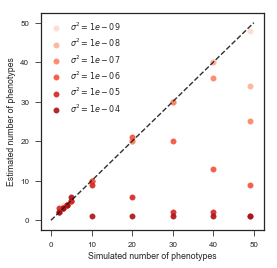

In [67]:
plt.figure(figsize=(4,4))
e_colors = sns.color_palette('Reds',len(err_list))
# e_names = ['Low Noise','Medium Noise','High Noise']
plt.plot([0,50],[0,50],'k--',alpha=0.9)
for d_true,out_list in detect_dict_CV.items():
    for e,err in enumerate(err_list):
        plt.scatter(d_true,out_list[e],color=e_colors[e],alpha=0.9)
        

plt.xlabel('Simulated number of phenotypes')
plt.ylabel('Estimated number of phenotypes')
plt.legend(['_']+[rf'$\sigma^2={err:.0e}$'for err in err_list])
plt.savefig('figureS1C.pdf',bbox_inches='tight')